In [27]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile
from IPython.display import display, Latex, Markdown
import plotly.express as px
import plotly.graph_objs as go
plt.rcParams['font.sans-serif'] = "Comic Sans MS"


# Celebrate Black Firsts
Our lack of awareness about racial inequaulity is often rooted in the little recognition that various racial minorities receive for their contributions to our society. Let's take a deep dive into the "firsts" in American society that were contributed by African-Americans and celebrate the innovative aspect of Black history!

I am uploading a dataset called firsts, from Kaggle as part of their efforts to support the Black Lives Matter movement. The data columns include the year, accomplishment, person, gender, and category of accomplishment. In this Jupyter notebook, we will use a statistical approach to learn more about firsts contributed to our society by African Americans. 

In [28]:
firsts = pd.read_csv("firsts.csv") 

#### This dataset has 479 rows and 5 columns.

In [29]:
firsts.shape

(479, 5)

#### Let's look at a few rows to see how the data is collected.

In [30]:
firsts.head(10)

,year,accomplishment,person,gender,category
0,1738,First free African-American community,Gracia Real de Santa Teresa de Mose (later nam...,African-American Firsts,Social & Jobs
1,1760,First known African-American published author,Jupiter Hammon (poem An Evening Thought,Female African American Firsts,Arts & Entertainment
2,1768,First known African-American to be elected to ...,"Wentworth Cheswell, town constable in Newmarke...",African-American Firsts,Social & Jobs
3,1773,First known African-American woman to publish ...,"Phillis Wheatley (Poems on Various Subjects, R...",Female African American Firsts,Arts & Entertainment
4,1773,First separate African-American church,"Silver Bluff Baptist Church, Aiken County, Sou...",African-American Firsts,Religion
5,1775,First African-American to join the Freemasons,Prince Hall,African-American Firsts,Social & Jobs
6,1778,First African-American U.S. military regiment,the 1st Rhode Island Regiment[9],African-American Firsts,Military
7,1783,First African-American to formally practice me...,"James Derham, who did not hold an M.D. degree....",African-American Firsts,Education & Science
8,1785,First African-American ordained as a Christian...,Rev. Lemuel Haynes. He was ordained in the Con...,African-American Firsts,Religion
9,1792,First major African-American Back-to-Africa mo...,"3,000 Black Loyalist slaves, who had escaped ...",African-American Firsts,Social & Jobs


## Question 1: How have the number of firsts contributed by African Americans changed over time according to this dataset?

Text(0.5, 1.0, 'African American Firsts (Achievements) Per Year')

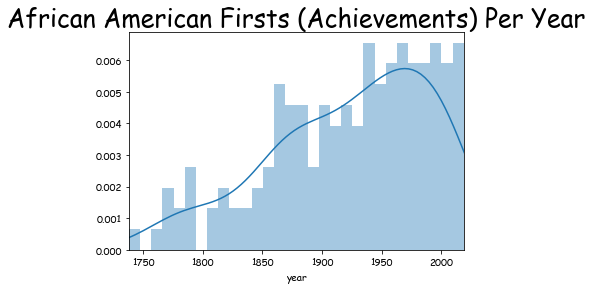

In [31]:
per_year = firsts.groupby('year').count().reset_index()
sns.distplot(per_year['year'],bins=30)
plt.xlim(1738,2019)
plt.title("African American Firsts (Achievements) Per Year",fontsize=25)

The code above does the following things: counts the number of achievements per year and plots a histogram of the number of achievements per year. This data set covers the achievements from 1738 to 2019. As we can see there is a steady increase in African-American achievements until somewhere near 1970. This is an interesting feature to point out because this time period was important for the Civil Rights Movement. 

## Question 2: Is there a relationship between the gender and the category of achievement in African-American firsts?

Text(0.5, 1.0, 'African American Firsts Per Category By Gender')

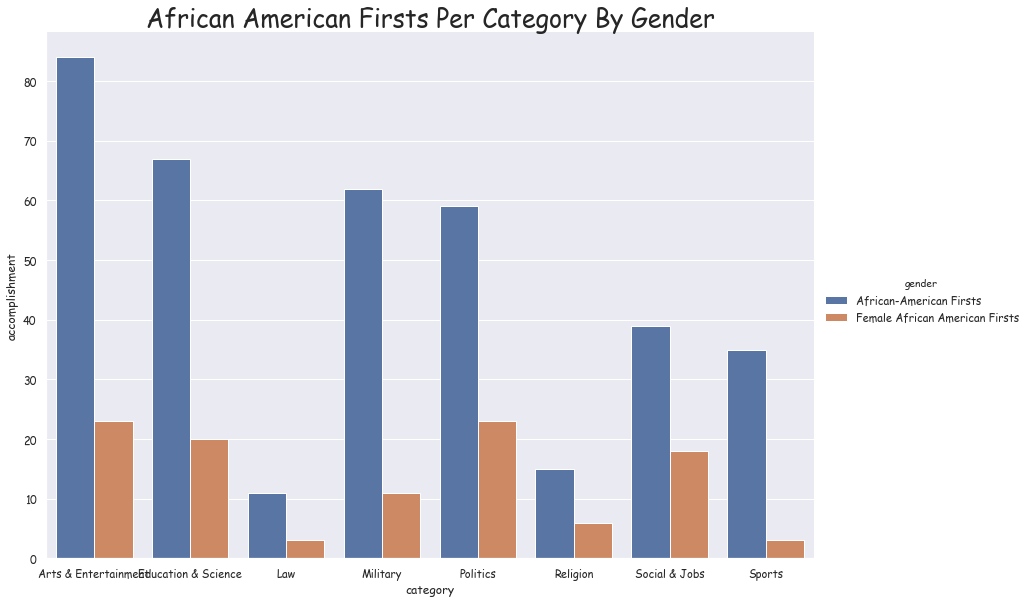

In [85]:
by_gender_category = firsts.groupby(["category","gender"]).count().reset_index()
plt.rcParams['font.sans-serif'] = "Comic Sans MS"
sns.catplot(x='category',y='accomplishment',hue='gender',kind='bar',data=by_gender_category, height=8.27, aspect=11.7/8.27)
plt.title("African American Firsts Per Category By Gender",fontsize=25)

Text(0.5, 1.0, 'African American Firsts Per Category (All)')

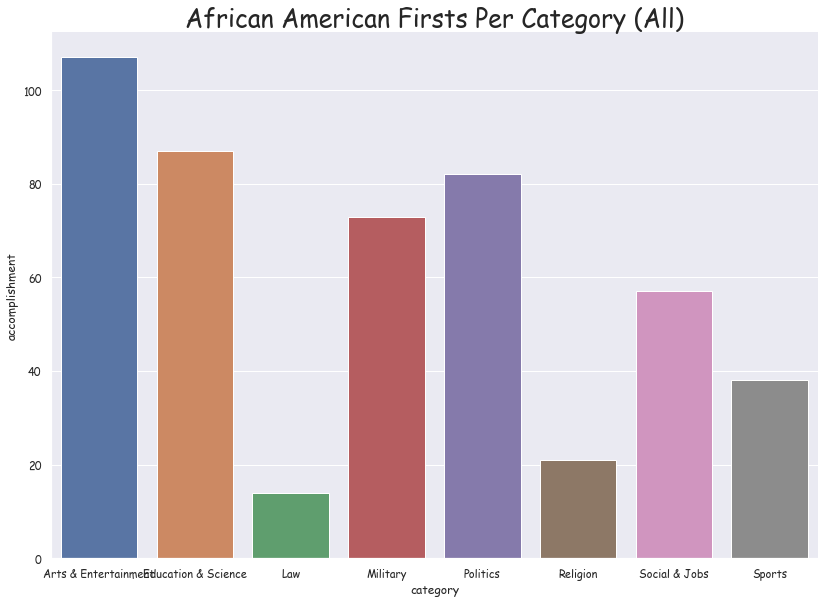

In [88]:
by_category = firsts.groupby("category").count().reset_index()
plt.rcParams['font.sans-serif'] = "Comic Sans MS"
sns.catplot(x='category',y='accomplishment',kind='bar',data=by_category, height=8.27, aspect=11.7/8.27)
plt.title("African American Firsts Per Category (All)",fontsize=25)

Both of these plots show that most of the African American firsts were in the Arts & Entertainment category, followed by Education & Science and Politics. The least number of African American firsts was in the law category. The first bar chart which shows the number of achievements by category *and gender* shows that female African Americans produced much less than half of all accomplishments in every category. Most female African American firsts are in Arts & Entertainment and Politics.

## Visualize Accomplishments by Year and Category
First, we will decode the categories into numerical values so that we can spread them visually on the y-axis. Now we will use Plotly, a type of Python visualization tool that allows us to find out more information about data points when you hover over them. You can zoom in and read different African American firsts as you hover over them!

In [120]:
firsts["category"] = firsts["category"].astype('category')
firsts["category_num"] = firsts["category"].cat.codes
firsts["category"] = firsts["category"].astype('object')
firsts.head(5)

,year,accomplishment,person,gender,category,category_cat,category_num
0,1738,First free African-American community,Gracia Real de Santa Teresa de Mose (later nam...,African-American Firsts,Social & Jobs,6,6
1,1760,First known African-American published author,Jupiter Hammon (poem An Evening Thought,Female African American Firsts,Arts & Entertainment,0,0
2,1768,First known African-American to be elected to ...,"Wentworth Cheswell, town constable in Newmarke...",African-American Firsts,Social & Jobs,6,6
3,1773,First known African-American woman to publish ...,"Phillis Wheatley (Poems on Various Subjects, R...",Female African American Firsts,Arts & Entertainment,0,0
4,1773,First separate African-American church,"Silver Bluff Baptist Church, Aiken County, Sou...",African-American Firsts,Religion,5,5


In [124]:
import plotly.express as px

fig = px.scatter(firsts, x="year", y="category_num", log_x=True,
                 hover_name="category", hover_data=["accomplishment", "category"])

fig.show()

In case, you cannot see the Plotly graph, here is a .png version of it. Unfortunately, the hover feature is accessible through this image. I encourage you to import Plotly so that you can see its fascinating visualization features!
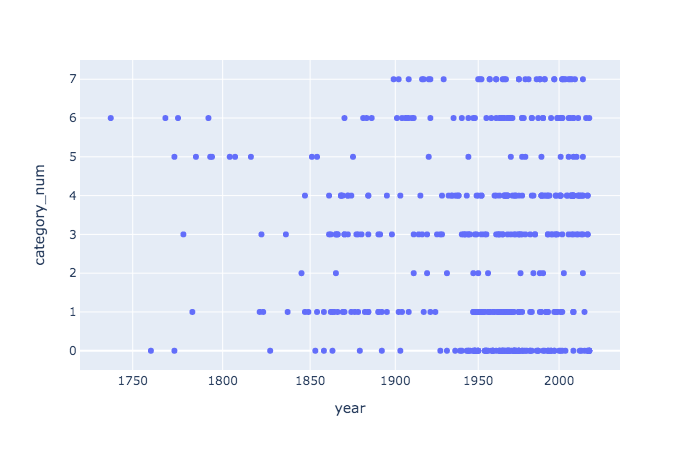

# Follow Up Questions and Exercises:

### ~ What did you learn about African American firsts?
### ~ Has this exploration of the data created any new questions you have about African American firsts?
### ~ What are some additional relationships you could have explored with this dataset?

## Challenge: Download your own dataset (.csv) and use this skeleton code to explore your data!
    